# Test of the controlling Ardruino hardware with python

Tutorial based on: https://realpython.com/arduino-python/#:~:text=All%20in%20all,%20Arduino%20and%20Python%20can%20facilitate,well%20as%20digital%20and%20analog%20inputs%20and%20outputs.

To run the examples, you’ll need to assemble the circuits by hooking up electronic components. You can generally find these items at electronic component stores or in good Arduino starter kits. You’ll need:
- An Arduino Uno or other compatible board
- A standard LED of any color
- A push button
- A 10 KOhm potentiometer
- A 470 Ohm resistor
- A 10 KOhm resistor
- A breadboard
- Jumper wires of various colors and sizes

Before running:
1. Connect the Arduino to the PC
2. Open Arduino IDE
3. Open and upload the StadardFirmata sketch
    - File->Examples->Firmata->StandardFirmata
    - Upload button is right arrow, in top left corner 

In [34]:
import pyfirmata
import time

In [38]:
# Use Arduino IDE to find the port name
# under Tools->Port
# This time is was COM3
board = pyfirmata.Arduino('COM3') 

# Test 1: Blinking LED


Set up the board like so:
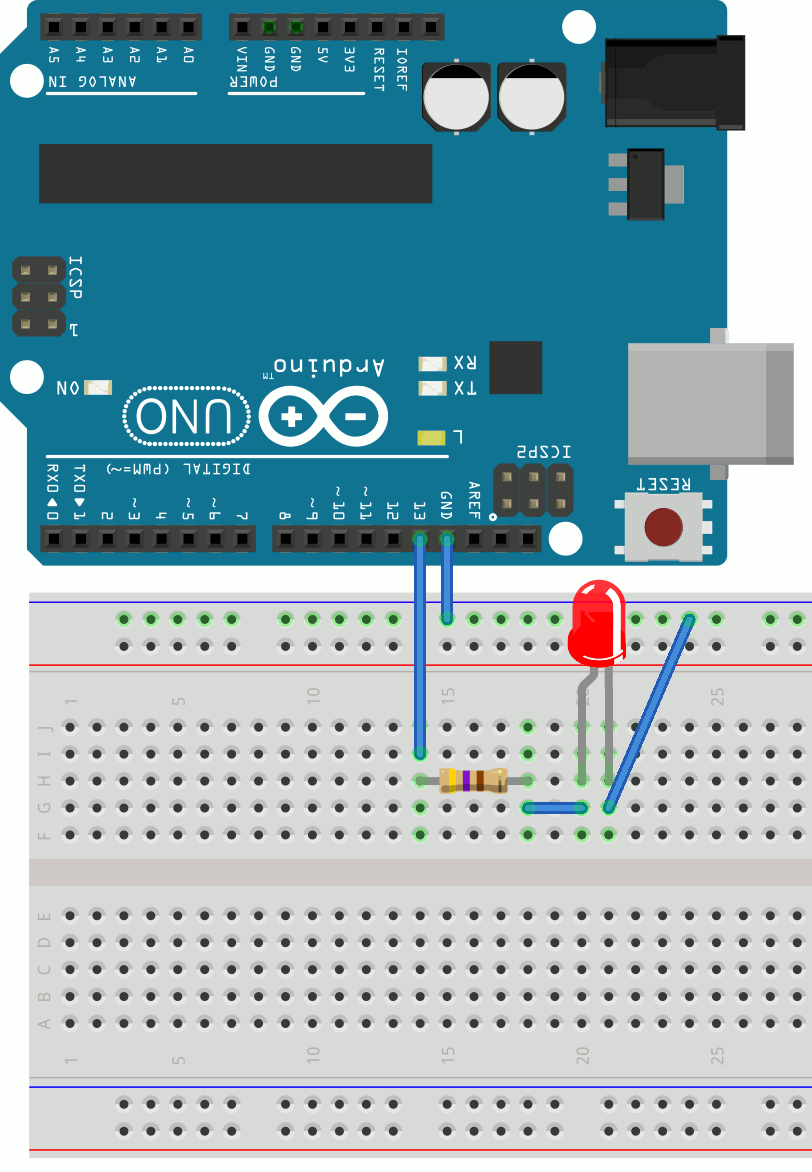

In [10]:
# Setting pin13 to 1 (write(1)) turns the LED on
# Setting pin13 to 0 (write(0)) turns the LED off
# time.sleep(1) waits for 1 second
reps = 5
for i in range(reps+1):
    board.digital[13].write(1)
    time.sleep(1)
    board.digital[13].write(0)
    time.sleep(1)

# Test 2: Reading Values
Set up the board like so:
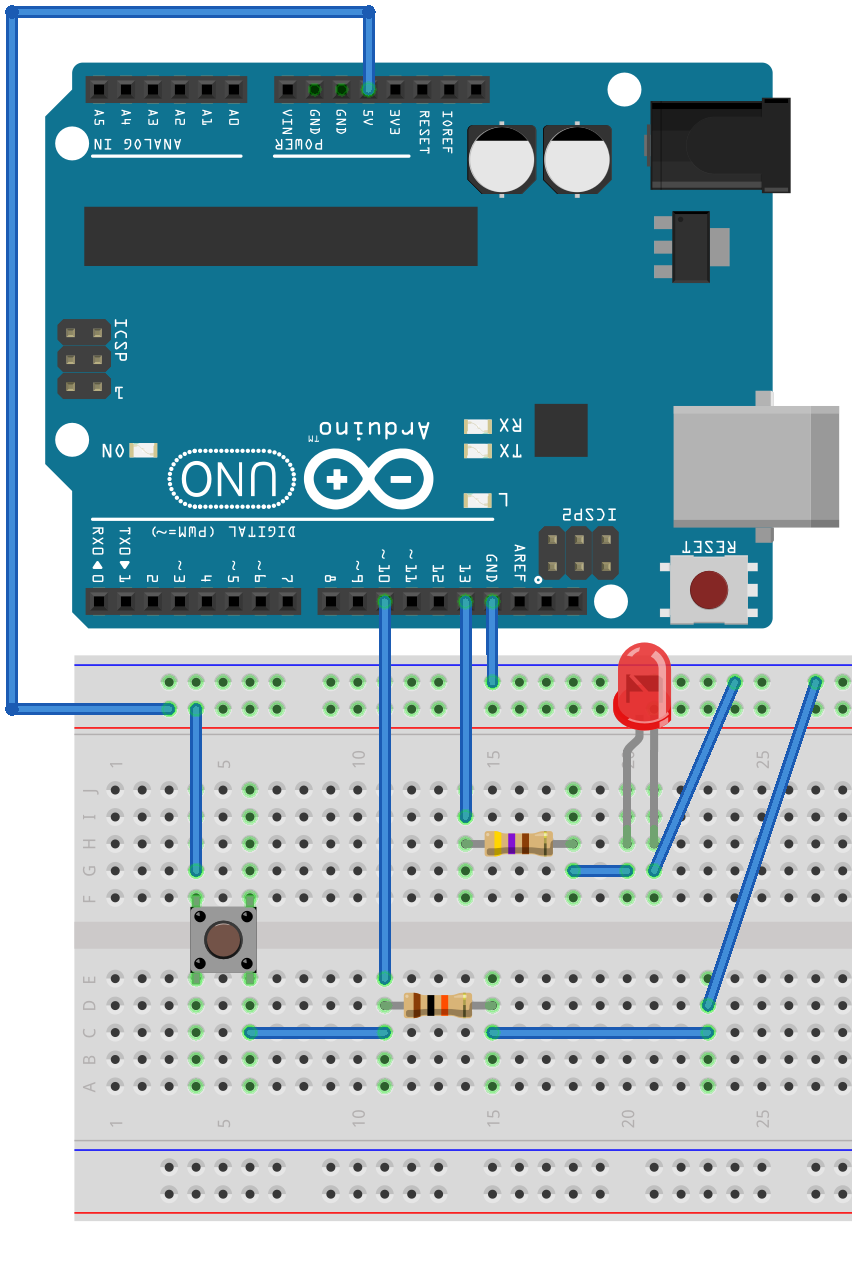

In [39]:
# Sets iterator to read status of inputs of circuit
it = pyfirmata.util.Iterator(board)
it.start()

# Assigns pin 10 to be input (default is output so must be set)
board.digital[10].mode = pyfirmata.INPUT

# When button is not pressed, the light should be off
# When the button is pressed, the light should be on
while True:
    # Reads value at pin 10, LED on if true, off if false
    sw = board.digital[10].read()
    if sw is True:
        board.digital[13].write(1)
    else:
        board.digital[13].write(0)
    time.sleep(0.1)

KeyboardInterrupt: 